<center><u><H1>Support Vector Machines para Clasificación</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

## Loading data:

In [2]:
df=pd.read_csv("../data/iris_dataset.csv")
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing data:

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

LabelEncoder()

In [4]:
df['class']=le.transform(df['Class'].values)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['PetalLength','PetalWidth']], df['class'], test_size=0.3, random_state= 2019)

In [6]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## Defining the model

In [8]:
from sklearn.svm import SVC

In [9]:
svm = SVC(kernel='linear', C=1.0)

In [10]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Metrics:

In [11]:
y_pred = svm.predict(X_test_std)

In [12]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.9777777777777777


In [13]:
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix
[[17  0  0]
 [ 0 16  1]
 [ 0  0 11]]


In [14]:
# Confusion Matrix in Pandas
print(pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted']))

Predicted   0   1   2
Actual               
0          17   0   0
1           0  16   1
2           0   0  11


In [15]:
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [16]:
scores = cross_val_score(svm, X_test_std, y_test, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Plotting linear and nonlinear models:

In [17]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
import Plotting_Decision_Boundaries as pdb

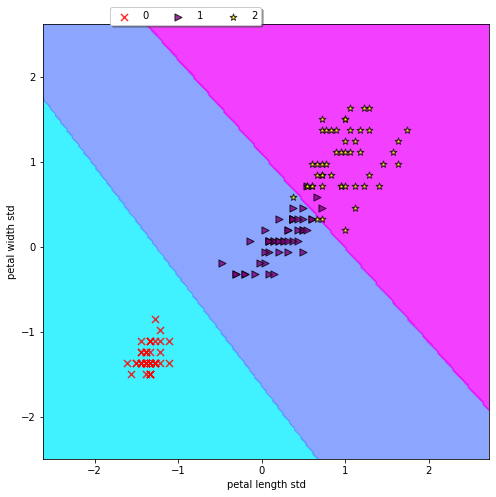

In [19]:
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

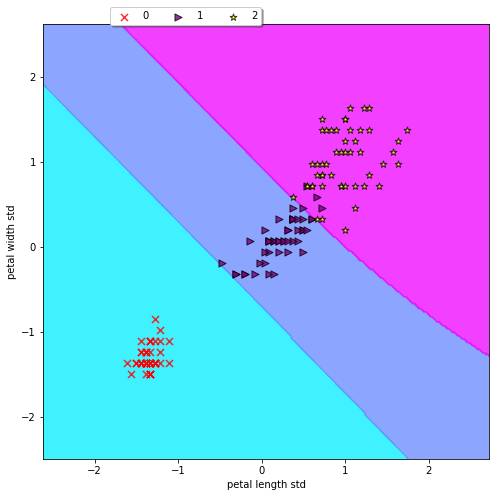

In [24]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

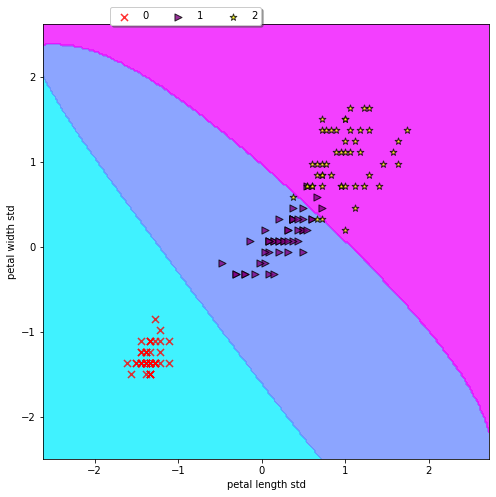

In [20]:
svm = SVC(kernel='rbf', gamma=0.2)
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)
#A higher value of gamma will perfectly fit the training dataset, which causes over-fitting.
#Gamma=0.1 is considered to be a good default value.

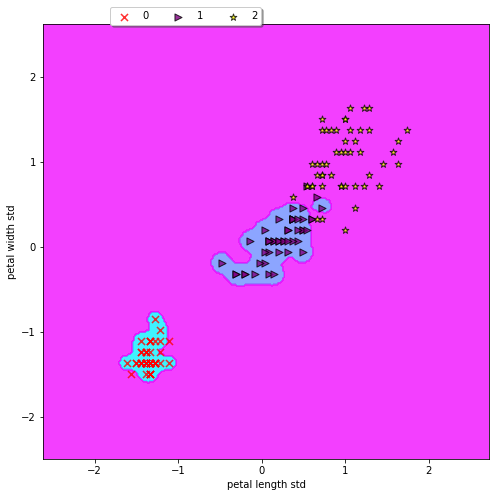

In [27]:
svm = SVC(kernel='rbf', gamma=100)
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

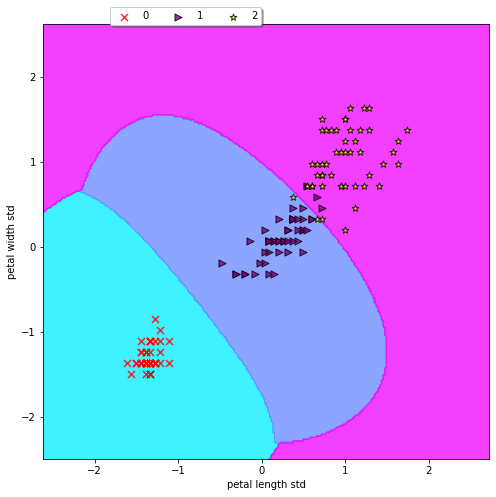

In [22]:
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

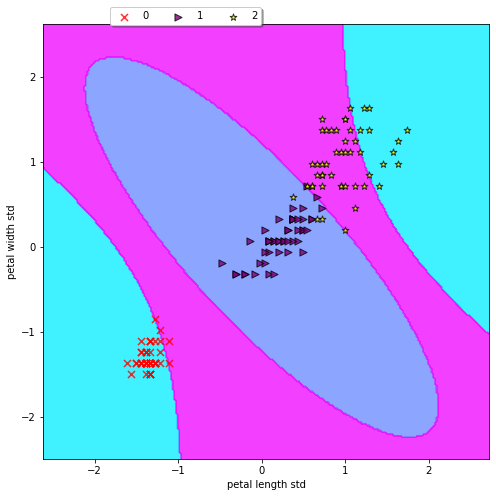

In [28]:
svm = SVC(kernel='poly', degree=2)
svm.fit(X_train_std, y_train)
pdb.plotting_db(X=X_combined_std,y=y_combined,classifier=svm)

## Reference: 
http://scikit-learn.org/stable/modules/svm.html